In [60]:
#fashion mnist classification

from __future__ import absolute_import, division, print_function, unicode_literals
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.15):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [61]:
callbacks = myCallback()

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

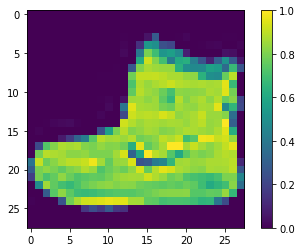

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#preprocessing the data
train_images = train_images / 255.0

test_images = test_images / 255.0

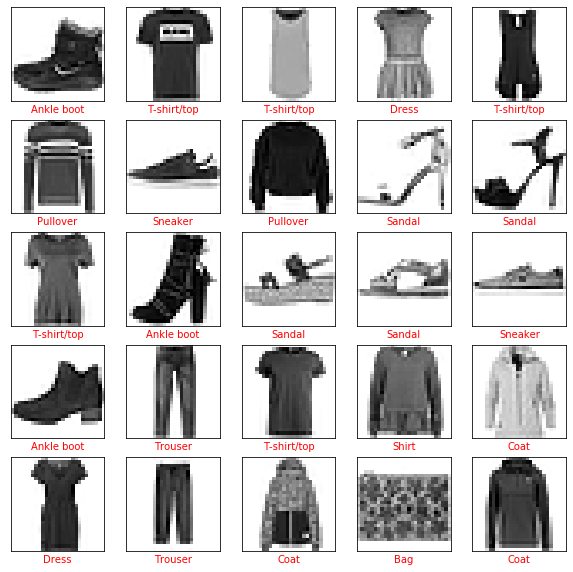

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]).set_color('red')
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.fit(train_images, train_labels, epochs=10,callbacks=[callbacks])


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1605 - accuracy: 0.9392
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1574 - accuracy: 0.9421
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1533 - accuracy: 0.9414
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1508 - accuracy: 0.9431
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1474 - accuracy: 0.9436
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1433 - accuracy: 0.9472
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1405 - accuracy: 0.9473
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1383 - accuracy: 0.9480
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1335 - accuracy: 0.9498
Epoch 10/10
60

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3370 - accuracy: 0.8821

Test accuracy: 0.8821


In [16]:
fashion_data = tf.keras.datasets.fashion_mnist
(train_data,train_lab),(test_data,test_lab) = fashion_data.load_data()

In [17]:
classes = ['A','B','C','D','E','F','G','H','I','J']

In [18]:
train_data.shape

(60000, 28, 28)

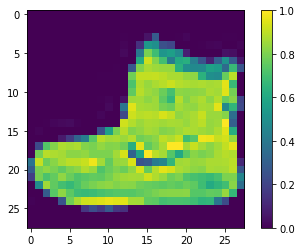

In [24]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()

In [23]:
train_data= train_data/255
test_data= test_data/255

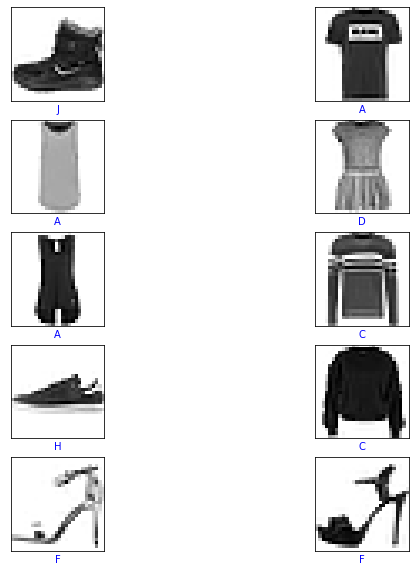

In [35]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_lab[i]]).set_color('blue')

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.fit(train_images,train_labels,epochs=10,callbacks = [callbacks])

Train on 60000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.1303 - accuracy: 0.9507
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1303 - accuracy: 0.9507


In [40]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy',test_acc)

10000/10000 - 0s - loss: 0.3244 - accuracy: 0.8907
Test accuracy 0.8907


In [41]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [42]:
pred= prob_model.predict(test_images)

In [43]:
pred[0]

array([4.1725416e-06, 1.6317282e-08, 1.7934824e-10, 9.0164022e-12,
       1.0256334e-09, 7.3566772e-03, 3.9532171e-07, 5.9003499e-03,
       4.5918426e-07, 9.8673791e-01], dtype=float32)

In [45]:
np.argmax(pred[0])

9